#1. Setup Necessary Libraries

In [1]:
import pandas as pd
import time
import math
import matplotlib.pyplot as plt
import matplotlib

In [2]:
from sklearn import metrics
import numpy as np

In [32]:
import seaborn as sns

In [3]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"

# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

In [4]:
# Suppress annoying warnings!
import logging
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

In [6]:
# remove top and right axis from plots
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False

In [7]:
# setting font size
plt.rcParams.update({'font.size': 14})

#2. Setup Data

In [8]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [9]:
# Creates a symbolic link for the model comparison folder
!ln -s /content/gdrive/Othercomputers/My\ PC/PhD_UOM/General/BSBRL/Projects/Motorized_Commutator/Paper/Model_Comparison/Data /Data

In [10]:
!ls /Data

EVAL_DLC_MOBILENET-APA_htcm_2024-02-18.csv    EVAL_DLC_RESNET-BM_params_2024-02-18.csv
EVAL_DLC_MOBILENET-APA_it_2024-02-18.csv      EVAL_DLC_RESNET-OF_htcm_2024-02-18.csv
EVAL_DLC_MOBILENET-APA_params_2024-02-18.csv  EVAL_DLC_RESNET-OF_it_2024-02-18.csv
EVAL_DLC_MOBILENET-BM_htcm_2024-02-18.csv     EVAL_DLC_RESNET-OF_params_2024-02-18.csv
EVAL_DLC_MOBILENET-BM_it_2024-02-18.csv       EVAL_SLEAP-APA_htcm_2024-02-18.csv
EVAL_DLC_MOBILENET-BM_params_2024-02-18.csv   EVAL_SLEAP-APA_it_2024-02-18.csv
EVAL_DLC_MOBILENET-OF_htcm_2024-02-18.csv     EVAL_SLEAP-APA_params_2024-02-18.csv
EVAL_DLC_MOBILENET-OF_it_2024-02-18.csv       EVAL_SLEAP-BM_htcm_2024-02-18.csv
EVAL_DLC_MOBILENET-OF_params_2024-02-18.csv   EVAL_SLEAP-BM_it_2024-02-18.csv
EVAL_DLC_RESNET-APA_htcm_2024-02-18.csv       EVAL_SLEAP-BM_params_2024-02-18.csv
EVAL_DLC_RESNET-APA_it_2024-02-18.csv	      EVAL_SLEAP-OF_htcm_2024-02-18.csv
EVAL_DLC_RESNET-APA_params_2024-02-18.csv     EVAL_SLEAP-OF_it_2024-02-18.csv
EVAL_DLC_RESNET-BM_

In [11]:
# Setup data paths
# Some accronym definitions:

prefix = "EVAL_"

m1_r = "DLC_RESNET-"
m1_m = "DLC_MOBILENET-"

m2 = "SLEAP-"

b1 = "APA_"
b2 = "BM_"
b3 = "OF_"

suffix1 = "htcm_2024-02-18.csv"
suffix2 = "it_2024-02-18.csv"

# Save confusion matrix and inference time data to a csv file

In [ ]:
# Combine the head and tail data into a list
ht = [['True Positive', 'True Negative', 'False Positive', 'False Negative', 'Invalid'],
      [tp_head, tn_head, fp_head, fn_head, invalid_head],
      [tp_tail, tn_tail, fp_tail, fn_tail, invalid_tail]]
ht

# Convert the list to dataframe
df_ht = pd.DataFrame(ht).transpose()

# Set column titles
columns = ['Class', 'Head', 'Tail']
df_ht.columns = columns
df_ht

,Class,Head,Tail
0,True Positive,12,17
1,True Negative,0,7
2,False Positive,0,0
3,False Negative,35,26
4,Invalid,3,0


In [ ]:
# Inference time
df_it = pd.DataFrame(inference_time)
df_it.columns = ['Inference Time (seconds)']
df_it.head(5)

NameError: name 'inference_time' is not defined

In [ ]:
# Evaluation information
eval_params = [['x-threshold', 'y-threshold', 'accuracy threshold'],
          [x_threshold, y_threshold, accuracy_threshold]]
df_eval_params = pd.DataFrame(eval_params).transpose()

In [ ]:
"""

# Save data to csv on disk
ht_filename = "/sleap_drive/Data/Paper/" + model_name + "_COLAB_eval_htcm.csv"
df_ht.to_csv(ht_filename)

it_filename = "/sleap_drive/Data/Paper/" + model_name + "_COLAB_eval_it.csv"
df_it.to_csv(it_filename)

eval_params_filename = "/sleap_drive/Data/Paper/" + model_name + "_COLAB_eval_params.csv"
df_eval_params.to_csv(eval_params_filename)

"""

'\n\nmodel_name = "SLEAP-02"\n\n# Save data to csv on disk\nht_filename = "/sleap_drive/Data/Paper/" + model_name + "_COLAB_eval_htcm.csv"\ndf_ht.to_csv(ht_filename)\n\nit_filename = "/sleap_drive/Data/Paper/" + model_name + "_COLAB_eval_it.csv"\ndf_it.to_csv(it_filename)\n\neval_params_filename = "/sleap_drive/Data/Paper/" + model_name + "_COLAB_eval_params.csv"\ndf_eval_params.to_csv(eval_params_filename)\n\n'

*** **bold text** Visualizing Inference

# 4a. Plot Model Comparison Graphs APA

In [82]:
# Import csv files for head and tail comparisons
APA_dlc_r_ht = pd.read_csv("/Data/" + prefix + m1_r + b1 + suffix1)
APA_dlc_m_ht = pd.read_csv("/Data/" + prefix + m1_m + b1 + suffix1)
APA_SLEAP_ht = pd.read_csv("/Data/" + prefix + m2 + b1 + suffix1)

In [83]:
# Import csv files for inference time comparisons
APA_dlc_r_it = pd.read_csv("/Data/" + prefix + m1_r + b1 + suffix2)
APA_dlc_m_it = pd.read_csv("/Data/" + prefix + m1_m + b1 + suffix2)
APA_SLEAP_it = pd.read_csv("/Data/" + prefix + m2 + b1 + suffix2)

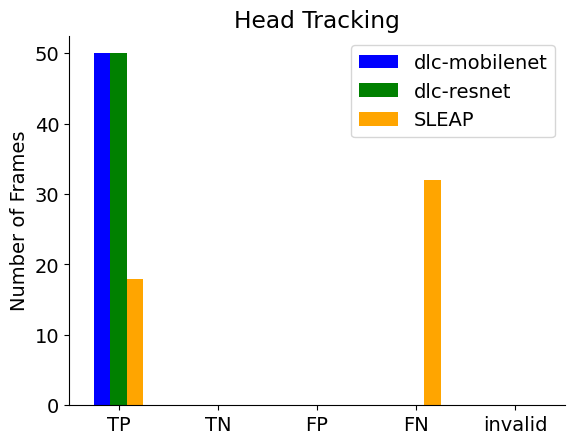

In [84]:
# COMPILE AND PLOT HEAD DATA

mobilenet_head = list(APA_dlc_m_ht['Head'])
resnet_head = list(APA_dlc_r_ht['Head'])
sleap_head = list(APA_SLEAP_ht['Head'])

index = ['TP', 'TN', 'FP', 'FN', 'invalid']

df_head = pd.DataFrame({'dlc-mobilenet': mobilenet_head,
                   'dlc-resnet': resnet_head,
                   'SLEAP': sleap_head}, index=index)

colors=['blue', 'green', 'orange']
ax = df_head.plot.bar(rot=0, color=colors)
ax.set_ylabel('Number of Frames')
ax.set_title('Head Tracking')

# Save figure to disk
model_name = "APA_Head_Tracking"
plt.savefig("/Data/Plots/" + model_name + ".eps")

plt.show()

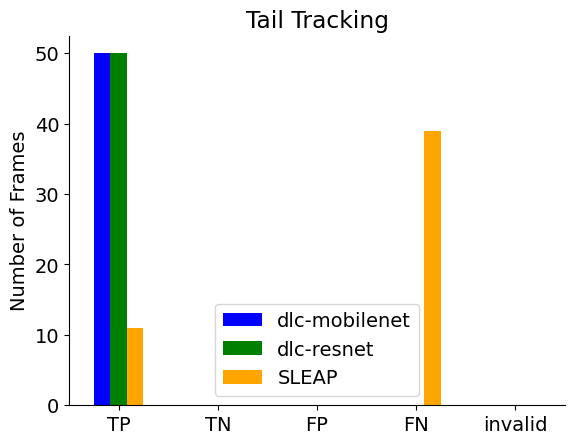

In [85]:
# COMPILE AND PLOT TAIL DATA

mobilenet_tail = list(APA_dlc_m_ht['Tail'])
resnet_tail = list(APA_dlc_r_ht['Tail'])
sleap_tail = list(APA_SLEAP_ht['Tail'])

index = ['TP', 'TN', 'FP', 'FN', 'invalid']

df_head = pd.DataFrame({'dlc-mobilenet': mobilenet_tail,
                   'dlc-resnet': resnet_tail,
                   'SLEAP': sleap_tail}, index=index)

colors=['blue', 'green', 'orange']
ax = df_head.plot.bar(rot=0, color=colors)
ax.set_ylabel('Number of Frames')
ax.set_title('Tail Tracking')

# Save figure to disk
model_name = "APA_Tail_Tracking"
plt.savefig("/Data/Plots/" + model_name + ".eps")

plt.show()

In [86]:
# COMPILE AND PLOT INFERENCE TIME DATA

mobilenet_it = list(APA_dlc_m_it['Inference Time (seconds)'])
resnet_it = list(APA_dlc_r_it['Inference Time (seconds)'])
SLEAP_it = list(APA_SLEAP_it['Inference Time (seconds)'])

frame_count = list(APA_dlc_m_it['Unnamed: 0'])

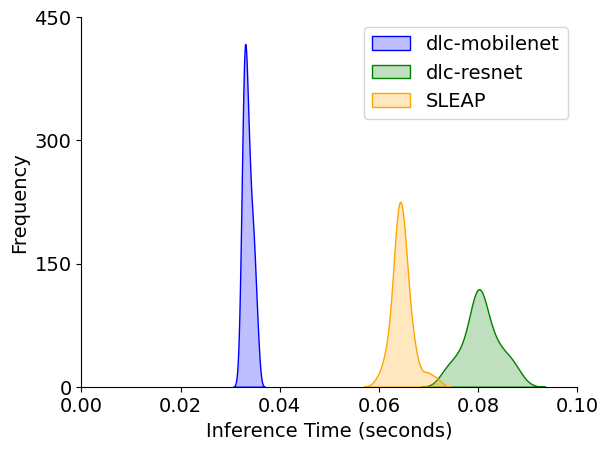

In [87]:
# Plot inference time distribution

fig = plt.figure()
ax1 = fig.add_subplot(111)

# ax1.hist(mobilenet_it, alpha=0.5, color='blue', label='dlc-mobilenet', bins=50)
# ax1.hist(resnet_it, alpha=0.5, color='green', label='dlc-resnet', bins=50)
# ax1.hist(SLEAP_it, alpha=0.5, color='orange', label='SLEAP', bins=50)

sns.kdeplot(mobilenet_it, label='dlc-mobilenet', fill=True, color='blue')
sns.kdeplot(resnet_it, label='dlc-resnet', fill=True, color='green')
sns.kdeplot(SLEAP_it, label='SLEAP', fill=True, color='orange')

xtick_loc = [0, 0.02, 0.04, 0.06, 0.08, 0.10]
ax1.set_xticks(xtick_loc)

ytick_loc = [0, 150, 300, 450]
ax1.set_yticks(ytick_loc)

plt.xlabel('Inference Time (seconds)')
plt.ylabel('Frequency')
# plt.title('Histogram of Inference Times for Computer Vision Models')
plt.legend()

# Save figure to disk
model_name = "APA_Inference_Time"
plt.savefig("/Data/Plots/" + model_name + ".eps")

plt.show()

# 4b. Plot Model Comparison Graphs BM

In [70]:
# Import csv files for head and tail comparisons
dlc_r_ht = pd.read_csv("/Data/" + prefix + m1_r + b2 + suffix1)
dlc_m_ht = pd.read_csv("/Data/" + prefix + m1_m + b2 + suffix1)
SLEAP_ht = pd.read_csv("/Data/" + prefix + m2 + b2 + suffix1)

In [71]:
# Import csv files for inference time comparisons
dlc_r_it = pd.read_csv("/Data/" + prefix + m1_r + b2 + suffix2)
dlc_m_it = pd.read_csv("/Data/" + prefix + m1_m + b2 + suffix2)
SLEAP_it = pd.read_csv("/Data/" + prefix + m2 + b2 + suffix2)

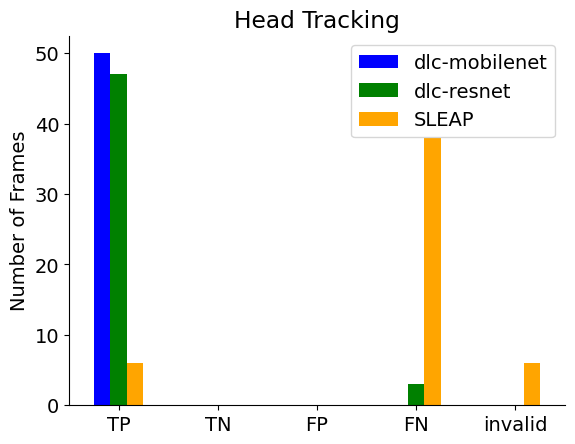

In [72]:
# COMPILE AND PLOT HEAD DATA

mobilenet_head = list(dlc_m_ht['Head'])
resnet_head = list(dlc_r_ht['Head'])
sleap_head = list(SLEAP_ht['Head'])

index = ['TP', 'TN', 'FP', 'FN', 'invalid']

df_head = pd.DataFrame({'dlc-mobilenet': mobilenet_head,
                   'dlc-resnet': resnet_head,
                   'SLEAP': sleap_head}, index=index)

colors=['blue', 'green', 'orange']
ax = df_head.plot.bar(rot=0, color=colors)
ax.set_ylabel('Number of Frames')
ax.set_title('Head Tracking')

# Save figure to disk
model_name = "BM_Head_Tracking"
plt.savefig("/Data/Plots/" + model_name + ".eps")

plt.show()

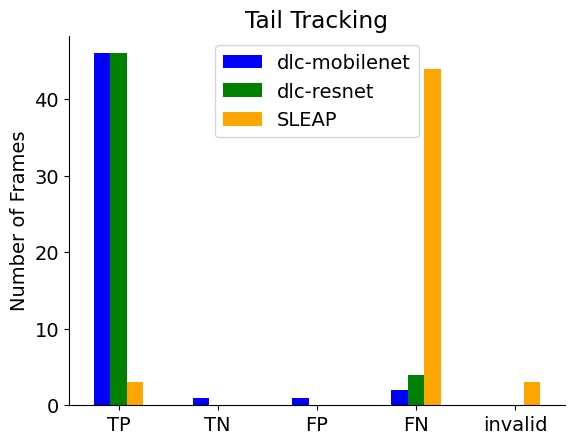

In [73]:
# COMPILE AND PLOT TAIL DATA

mobilenet_tail = list(dlc_m_ht['Tail'])
resnet_tail = list(dlc_r_ht['Tail'])
sleap_tail = list(SLEAP_ht['Tail'])

index = ['TP', 'TN', 'FP', 'FN', 'invalid']

df_head = pd.DataFrame({'dlc-mobilenet': mobilenet_tail,
                   'dlc-resnet': resnet_tail,
                   'SLEAP': sleap_tail}, index=index)

colors=['blue', 'green', 'orange']
ax = df_head.plot.bar(rot=0, color=colors)
ax.set_ylabel('Number of Frames')
ax.set_title('Tail Tracking')

# Save figure to disk
model_name = "BM_Tail_Tracking"
plt.savefig("/Data/Plots/" + model_name + ".eps")

plt.show()

In [74]:
# COMPILE AND PLOT INFERENCE TIME DATA

mobilenet_it = list(dlc_m_it['Inference Time (seconds)'])
resnet_it = list(dlc_r_it['Inference Time (seconds)'])
SLEAP_it = list(SLEAP_it['Inference Time (seconds)'])

frame_count = list(dlc_m_it['Unnamed: 0'])

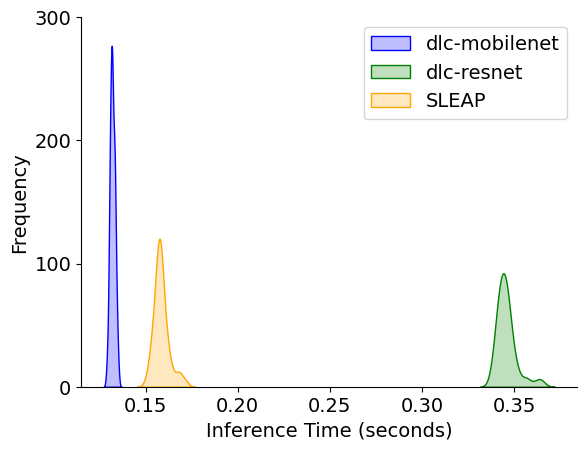

In [75]:
# Plot inference time distribution

fig = plt.figure()
ax1 = fig.add_subplot(111)

# ax1.hist(mobilenet_it, alpha=0.5, color='blue', label='dlc-mobilenet', bins=50)
# ax1.hist(resnet_it, alpha=0.5, color='green', label='dlc-resnet', bins=50)
# ax1.hist(SLEAP_it, alpha=0.5, color='orange', label='SLEAP', bins=50)

sns.kdeplot(mobilenet_it, label='dlc-mobilenet', fill=True, color='blue')
sns.kdeplot(resnet_it, label='dlc-resnet', fill=True, color='green')
sns.kdeplot(SLEAP_it, label='SLEAP', fill=True, color='orange')

xtick_loc = [0, 0.02, 0.04, 0.06, 0.08, 0.10]
# ax1.set_xticks(xtick_loc)

ytick_loc = [0, 100, 200, 300]
ax1.set_yticks(ytick_loc)

plt.xlabel('Inference Time (seconds)')
plt.ylabel('Frequency')
# plt.title('Histogram of Inference Times for Computer Vision Models')
plt.legend()

# Save figure to disk
model_name = "BM_Inference_Time"
plt.savefig("/Data/Plots/" + model_name + ".eps")

plt.show()

# 4c. Plot Model Comparison Graphs OF

In [76]:
# Import csv files for head and tail comparisons
dlc_r_ht = pd.read_csv("/Data/" + prefix + m1_r + b3 + suffix1)
dlc_m_ht = pd.read_csv("/Data/" + prefix + m1_m + b3 + suffix1)
SLEAP_ht = pd.read_csv("/Data/" + prefix + m2 + b3 + suffix1)

In [77]:
# Import csv files for inference time comparisons
dlc_r_it = pd.read_csv("/Data/" + prefix + m1_r + b3 + suffix2)
dlc_m_it = pd.read_csv("/Data/" + prefix + m1_m + b3 + suffix2)
SLEAP_it = pd.read_csv("/Data/" + prefix + m2 + b3 + suffix2)

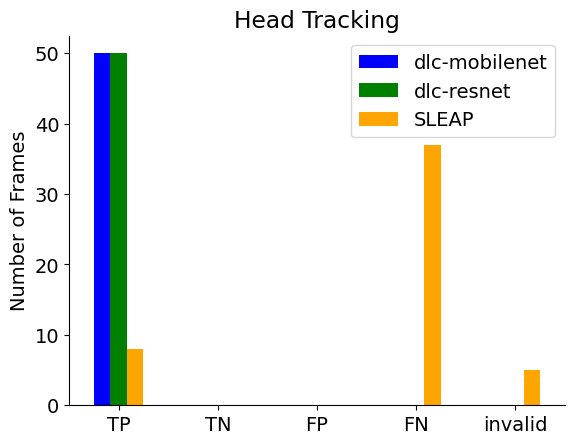

In [78]:
# COMPILE AND PLOT HEAD DATA

mobilenet_head = list(dlc_m_ht['Head'])
resnet_head = list(dlc_r_ht['Head'])
sleap_head = list(SLEAP_ht['Head'])

index = ['TP', 'TN', 'FP', 'FN', 'invalid']

df_head = pd.DataFrame({'dlc-mobilenet': mobilenet_head,
                   'dlc-resnet': resnet_head,
                   'SLEAP': sleap_head}, index=index)

colors=['blue', 'green', 'orange']
ax = df_head.plot.bar(rot=0, color=colors)
ax.set_ylabel('Number of Frames')
ax.set_title('Head Tracking')

# Save figure to disk
model_name = "OF_Head_Tracking"
plt.savefig("/Data/Plots/" + model_name + ".eps")

plt.show()

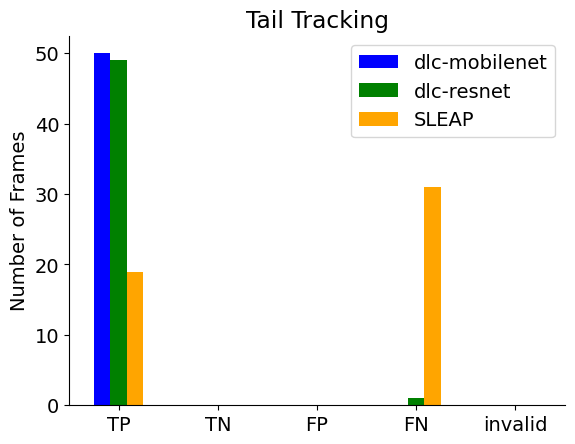

In [79]:
# COMPILE AND PLOT TAIL DATA

mobilenet_tail = list(dlc_m_ht['Tail'])
resnet_tail = list(dlc_r_ht['Tail'])
sleap_tail = list(SLEAP_ht['Tail'])

index = ['TP', 'TN', 'FP', 'FN', 'invalid']

df_head = pd.DataFrame({'dlc-mobilenet': mobilenet_tail,
                   'dlc-resnet': resnet_tail,
                   'SLEAP': sleap_tail}, index=index)

colors=['blue', 'green', 'orange']
ax = df_head.plot.bar(rot=0, color=colors)
ax.set_ylabel('Number of Frames')
ax.set_title('Tail Tracking')

# Save figure to disk
model_name = "OF_Tail_Tracking"
plt.savefig("/Data/Plots/" + model_name + ".eps")

plt.show()

In [80]:
# COMPILE AND PLOT INFERENCE TIME DATA

mobilenet_it = list(dlc_m_it['Inference Time (seconds)'])
resnet_it = list(dlc_r_it['Inference Time (seconds)'])
SLEAP_it = list(SLEAP_it['Inference Time (seconds)'])

frame_count = list(dlc_m_it['Unnamed: 0'])

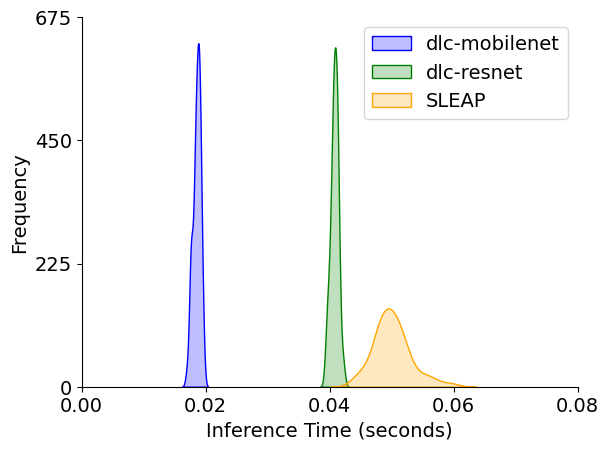

In [81]:
# Plot inference time distribution

fig = plt.figure()
ax1 = fig.add_subplot(111)

# ax1.hist(mobilenet_it, alpha=0.5, color='blue', label='dlc-mobilenet', bins=50)
# ax1.hist(resnet_it, alpha=0.5, color='green', label='dlc-resnet', bins=50)
# ax1.hist(SLEAP_it, alpha=0.5, color='orange', label='SLEAP', bins=50)

sns.kdeplot(mobilenet_it, label='dlc-mobilenet', fill=True, color='blue')
sns.kdeplot(resnet_it, label='dlc-resnet', fill=True, color='green')
sns.kdeplot(SLEAP_it, label='SLEAP', fill=True, color='orange')

xtick_loc = [0, 0.02, 0.04, 0.06, 0.08]
ax1.set_xticks(xtick_loc)

ytick_loc = [0, 225, 450, 675]
ax1.set_yticks(ytick_loc)

plt.xlabel('Inference Time (seconds)')
plt.ylabel('Frequency')
# plt.title('Histogram of Inference Times for Computer Vision Models')
plt.legend()

# Save figure to disk
model_name = "OF_Inference_Time"
plt.savefig("/Data/Plots/" + model_name + ".eps")

plt.show()

# Scrap Section

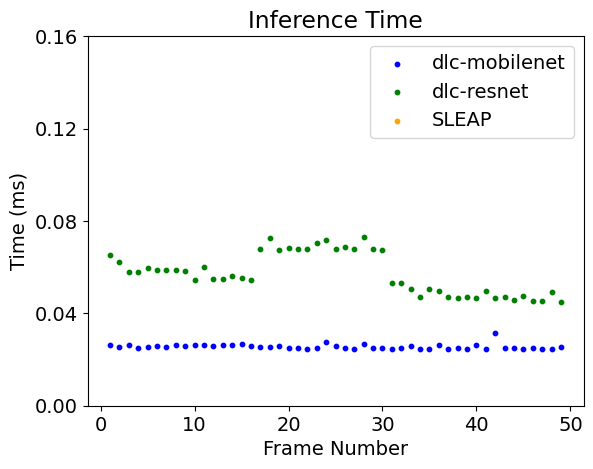

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(frame_count[1:], mobilenet_it[1:], c='blue', s=10, label='dlc-mobilenet')
ax1.scatter(frame_count[1:], resnet_it[1:], c='green', s=10, label='dlc-resnet')
ax1.scatter(frame_count[1:], df_it[1:], c='orange', s=10, label='SLEAP')
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Frame Number')
ax1.set_title('Inference Time')

ytick_loc = [0, 0.04, 0.08, 0.12, 0.16]
ax1.set_yticks(ytick_loc)

ax1.set_ylim((0, 0.16))

plt.legend(loc='best')

# Save figure to disk
model_name = "COMBINED_WIDER"
# plt.savefig("../Data/Paper/" + model_name + "_" + str(x_threshold) + "_COLAB_" + str(y_threshold) + "_" + str(accuracy_threshold) + ".eps")

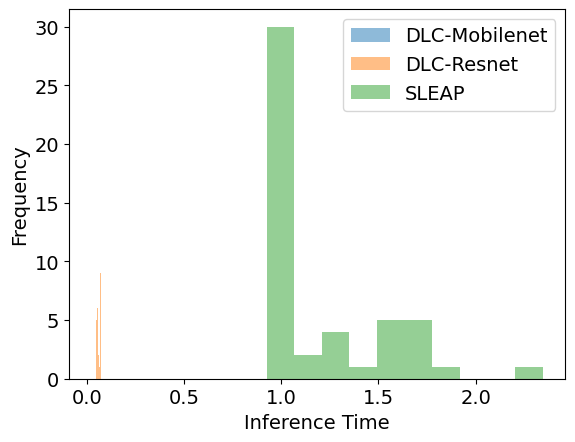

In [ ]:
# setting font size
plt.rcParams.update({'font.size': 14})

# fig = plt.figure(figsize=(12,11))
fig = plt.figure()

plt.hist(mobilenet_it[1:], alpha=0.5, label='DLC-Mobilenet', bins=10)
plt.hist(resnet_it[1:], alpha=0.5, label='DLC-Resnet', bins=10)
plt.hist(df_it[1:], alpha=0.5, label='SLEAP', bins=10)

plt.xlabel('Inference Time')
plt.ylabel('Frequency')
# plt.title('Histogram of Inference Times for Computer Vision Models')
plt.legend()

plt.show()